<a href="https://colab.research.google.com/github/RawanKhaled20/growintern_Task2/blob/main/HandWritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [ ]:
dataset = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=tf.keras.utils.normalize (x_train, axis=1)
x_test=tf.keras.utils.normalize (x_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(x_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2634 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1090 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0733 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0541 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9868


In [ ]:
model.save('handwritten_model')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss, accuracy= model.evaluate(x_test, y_test)

print("The total loss is: ", loss)
print("The accuracy is: ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9735
The total loss is:  0.08960705250501633
The accuracy is:  0.9735000133514404


In [ ]:
from google.colab import files
files.upload()

Saving Images.zip to Images.zip


{'Images.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x15\x8bFW\x9eRyV\x03\x01\x00\x00\x05\x01\x00\x00\x12\x00\x00\x00Images/12_test.png\xeb\x0c\xf0s\xe7\xe5\x92\xe2b``\xe0\xf5\xf4p\t\x02\xd22 \xcc\xc1\x04$\xff\xe6{\x1c\x06R\x8c\xc5A\xeeN\x0c\xeb\xce\xc9\xbc\x04rX\xd2\x1d}\x1d\x19\x186\xf6s\xffId\x05\xf29\x0b<"\x8b\x19\x18\x84J@\x98\xf1^\x9a|\x05Pp\x96\xa7\x8bc\x88\x87\xf7\xd3)\xd1\\\x07\x14xX|\xdf\xd7\xa7K\x07\x9c\x92\xba\xbe\xdd\xe9\xe0\xcfL\xcf\xb33"B\xf7|\xcf3\xf7\xaf\xc9k\xf5vU\xd9\xe7[\xb8$h\xd3\xb2\x85gNE]\xb6+\xd83\xb5L\xea\xb3NO\xcf\xd6\xfbs\x8c&xd\xc6\xb3e]Qx\xa6\x16\xf4\xd7\xad\xd8M2{\x7f\xf1)\xe5\xe8Wf+o\x9a\xdd\xd6:Z_qu\xd6\xac\xe6\xf5k\xbc\x8a\x17oR\xd1\xbd+\xbaz\xea\xa5\xe6\xe8=K&^\x92\xc8\nY\xb4\xc5\xbd\xe5\xc2\xb1\xfd"A\x99\xc2Qjl\xe9K|\xff\xed\xfaY\xcc\xe71\xb7\x9aqFe\x88x0\x17\xdfG\xa0+\x19<]\xfd\\\xd69%4\x01\x00PK\x03\x04\x14\x00\x00\x00\x08\x00\xc0\x8aFWe\xbf&v\xf1\x00\x00\x00\xf5\x00\x00\x00\x11\x00\x00\x00Images/3_test.png\xeb\x0c\xf0s\xe7\xe5\x92\xe2b``\xe0\xf5\xf

In [ ]:
!unzip Images.zip -d /content/

Archive:  Images.zip
  inflating: /content/Images/12_test.png  
  inflating: /content/Images/3_test.png  
  inflating: /content/Images/5-test.png  
  inflating: /content/Images/8_test.png  


1/1 [==============================] - 0s 28ms/step
The digit is: 2


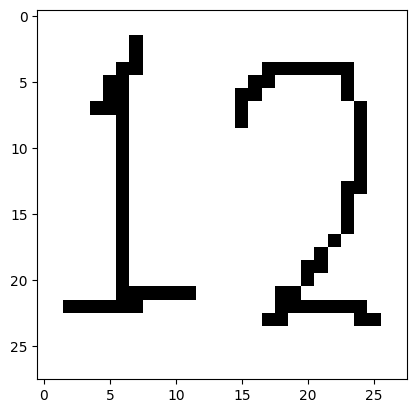

1/1 [==============================] - 0s 23ms/step
The digit is: 3


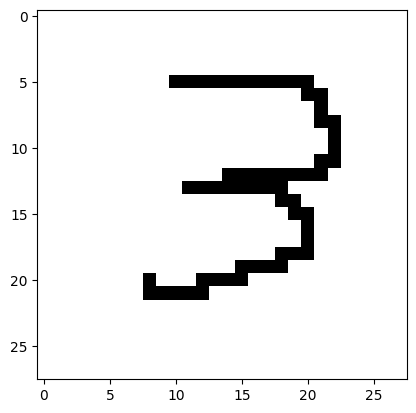

1/1 [==============================] - 0s 20ms/step
The digit is: 5


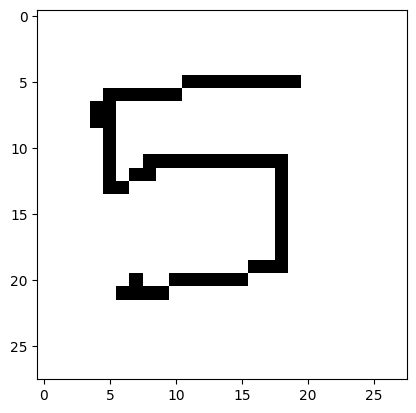

1/1 [==============================] - 0s 21ms/step
The digit is: 8


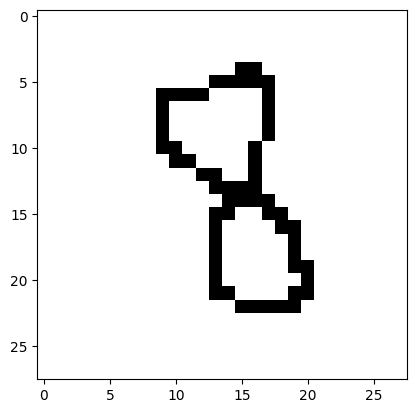

In [ ]:
num=1

while os.path.isfile(f"Images/digit{num}.png"):
  try:
    img=cv2.imread(f"Images/digit{num}.png")[:,:,0]
    img=np.invert(np.array([img]))
    prediction=model.predict(img)
    print("The digit is:", np.argmax(prediction))
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error")
  finally:
    num+=1